In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
con = sqlite3.connect("DB/test-000007.db")

df = pd.read_sql_query("SELECT * FROM COUNTERS_STRING_TIME_DATA", con)


In [3]:
df

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2022-12-11 07:05:03.151,2,explorer.exe,0
1,2022-12-11 07:05:03.151,3,XamlExplorerHostIslandWindow,0
2,2022-12-11 07:05:03.151,4,\DISPLAY1,0
3,2022-12-11 07:07:30.545,13,League of Legends,0
4,2022-12-11 07:07:30.545,2,LeagueClientUx.exe,0
...,...,...,...,...
98,2022-12-11 09:05:19.413,4,\DISPLAY2,0
99,2022-12-11 09:05:25.427,13,esrv.exe,0
100,2022-12-11 09:05:25.427,2,VsDebugConsole.exe,0
101,2022-12-11 09:05:25.427,3,ConsoleWindowClass,0


In [4]:
frames = []
for i in range(1, 51):
    if i < 10:
        filename = "DB/test-00000" + str(i) + ".db"
    else:
        filename = "DB/test-0000" + str(i) + ".db"
    #print(filename)
    cons = sqlite3.connect(filename)
    dfs = pd.read_sql_query("SELECT * FROM COUNTERS_STRING_TIME_DATA", cons)
    frames.append(dfs)

In [5]:
fulldf = pd.concat(frames, ignore_index=True)

In [6]:
fulldf

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2022-12-08 06:23:06.681,2,esrv.exe,0
1,2022-12-08 06:23:06.681,3,VsDebugConsole.exe,0
2,2022-12-08 06:23:06.681,4,ConsoleWindowClass,0
3,2022-12-08 06:23:06.681,5,\DISPLAY2,0
4,2022-12-08 06:23:12.697,2,League of Legends,0
...,...,...,...,...
12820,2023-02-10 10:53:52.681,4,\DISPLAY1,0
12821,2023-02-10 10:53:55.693,13,Start,0
12822,2023-02-10 10:53:55.693,2,StartMenuExperienceHost.exe,0
12823,2023-02-10 10:53:55.693,3,Windows.UI.Core.CoreWindow,0


In [7]:
fulldf["MEASUREMENT_TIME"] = pd.to_datetime(fulldf['MEASUREMENT_TIME'])

---

# EDA

earliest date

In [8]:
fulldf["MEASUREMENT_TIME"].min()

Timestamp('2022-12-08 06:23:06.681000')

Latest date

In [9]:
fulldf["MEASUREMENT_TIME"].max()

Timestamp('2023-02-10 10:53:55.693000')

In [10]:
fulldf["MEASUREMENT_TIME"].describe()

count                          12825
unique                          3212
top       2023-02-03 07:11:42.578000
freq                               4
first     2022-12-08 06:23:06.681000
last      2023-02-10 10:53:55.693000
Name: MEASUREMENT_TIME, dtype: object

In [11]:
fulldf["VALUE"].unique()

array(['esrv.exe', 'VsDebugConsole.exe', 'ConsoleWindowClass',
       '\\DISPLAY2', 'League of Legends', 'LeagueClientUx.exe', 'RCLIENT',
       'Activity for Zeming Zhang ( zhangzeming2023@163.com ) - Personal - Microsoft\u200b Edge',
       'msedge.exe', 'Chrome_WidgetWin_1', 'Search', 'SearchHost.exe',
       'Windows.UI.Core.CoreWindow', 'Spotify Premium', 'Spotify.exe',
       'Chrome_WidgetWin_0', 'League of Legends (TM) Client',
       'League of Legends.exe', 'RiotWindowClass', 'WeChat', 'WeChat.exe',
       'WeChatMainWndForPC', 'Beyond - 冷雨夜',
       'mouse_input - Microsoft Visual Studio', 'devenv.exe',
       'HwndWrapper[DefaultDomain;;7255853a-7402-4a93-8d95-e55c01fc3a3a]',
       'Drake - Jimmy Cooks (feat. 21 Savage)', '', 'explorer.exe',
       'NotifyIconOverflowWindow', 'CefWebViewWnd',
       '张泽明2023Fall研究生申请 and 4 more pages - Personal - Microsoft\u200b Edge',
       'Request for letter of recommendation - zezhang@ucsd.edu - UC San Diego Mail and 4 more pages - Pe

In [12]:
apps = fulldf[fulldf['VALUE'].str.contains(".exe|.EXE")]
apps = apps[apps["VALUE"] != "esrv.exe"]
apps

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
1,2022-12-08 06:23:06.681,3,VsDebugConsole.exe,0
5,2022-12-08 06:23:12.697,3,LeagueClientUx.exe,0
9,2022-12-08 06:23:21.730,3,msedge.exe,0
13,2022-12-08 06:23:27.732,3,LeagueClientUx.exe,0
17,2022-12-08 06:23:45.790,3,SearchHost.exe,0
...,...,...,...,...
12806,2023-02-10 10:53:43.667,2,msedge.exe,0
12810,2023-02-10 10:53:46.670,2,explorer.exe,0
12814,2023-02-10 10:53:49.672,2,SearchHost.exe,0
12818,2023-02-10 10:53:52.681,2,msedge.exe,0


In [13]:
len(apps["VALUE"].unique())

51

Most frenquent Application: msedge.exe (browser)

In [14]:
value = list(fulldf['VALUE'])
values = [i for i in value if i[-4:] == '.exe']
def most_common(lst):
    return max(set(lst), key=lst.count)
most_common(values)

'msedge.exe'

In [15]:
import collections
counter = collections.Counter(apps['VALUE'])
ranking = sorted(counter.items(), key=lambda x:x[1], reverse=True)
ranking[0]

('msedge.exe', 798)

In [16]:
app = [x[0] for x in ranking][:5]
count = [x[1] for x in ranking][:5]
count

[798, 545, 505, 267, 182]

Text(0, 0.5, 'Times of opening')

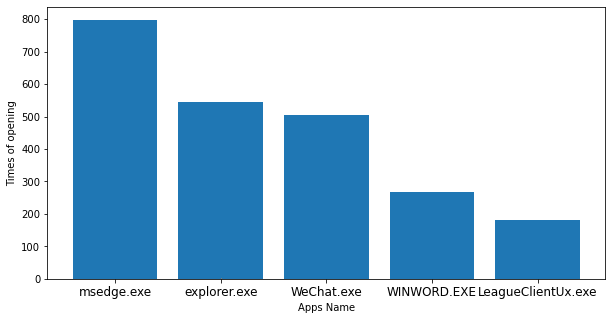

In [148]:
fig, ax = plt.subplots(figsize =(10, 5))
ax.bar(app, count)
#ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 0, fontweight ='bold',
             color ='grey')
plt.rc('xtick', labelsize=11)
plt.xlabel('Apps Name')
plt.ylabel('Times of opening')

---

HMM

In [18]:
app_name = [x[0] for x in ranking]
app_encode = []
for i in range(len(apps)):
    curr = list(apps["VALUE"])[i]
    app_encode.append(app_name.index(curr))
#app_encode

In [19]:
def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [20]:
matrix_value = transition_matrix(app_encode)
#matrix_value

In [21]:
matrix_dic = dict(zip(app_name, matrix_value))
#matrix_dic

In [22]:
def hmm_classifier(start_app):
    probs = matrix_dic[start_app]
    return app_name[probs.index(max(probs))]

In [23]:
hmm_classifier("Discord.exe")

'explorer.exe'

In [24]:
hmm_classifier("msedge.exe")

'WeChat.exe'

In [25]:
apps["NEXT"] = apps["VALUE"].shift(-1)
apps

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA,NEXT
1,2022-12-08 06:23:06.681,3,VsDebugConsole.exe,0,LeagueClientUx.exe
5,2022-12-08 06:23:12.697,3,LeagueClientUx.exe,0,msedge.exe
9,2022-12-08 06:23:21.730,3,msedge.exe,0,LeagueClientUx.exe
13,2022-12-08 06:23:27.732,3,LeagueClientUx.exe,0,SearchHost.exe
17,2022-12-08 06:23:45.790,3,SearchHost.exe,0,Spotify.exe
...,...,...,...,...,...
12806,2023-02-10 10:53:43.667,2,msedge.exe,0,explorer.exe
12810,2023-02-10 10:53:46.670,2,explorer.exe,0,SearchHost.exe
12814,2023-02-10 10:53:49.672,2,SearchHost.exe,0,msedge.exe
12818,2023-02-10 10:53:52.681,2,msedge.exe,0,StartMenuExperienceHost.exe


In [26]:
#app_name

In [27]:
#list(apps[apps["VALUE"] == 'msedge.exe']["NEXT"])

In [28]:
results = []
for i in range(len(app_name)):
    nexts = list(apps[apps["VALUE"] == app_name[i]]["NEXT"])
    counts = []
    for j in range(len(app_name)):
        counts.append(nexts.count(app_name[j]))
    probs = np.array(counts)/sum(counts)
    results.append(probs)
    

In [29]:
#results

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
def conditional_prob(X, y):
    probs = dict()
    for i in range(len(X)):
        probs[(X[i], y[i])] += 1
    for p in probs:
        probs[p] = probs[p]/sum([x==p[0] for x in X])
    return probs

In [32]:
def hmm_predict(X, y, n):
    '''
    X (pd.Series)
    y (pd.Series)
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    exe_names = X_train.unique()
    app_encode = []
    for i in range(len(X_train)):
        curr = list(X_train)[i]
        app_encode.append(list(exe_names).index(curr))
    trans_matrix = transition_matrix(app_encode)
    matrix_dic = dict(zip(exe_names, trans_matrix))
    preds = []
    for j in range(len(X_test)):
        looks = list(X_test)[j]
        if looks not in exe_names:
            preds.append('msedge.exe')
            continue
        probs = matrix_dic[looks]
        pdic = dict(zip(probs, list(exe_names)))
        tops = sorted(pdic)[-n:]
        topn = []
        for t in tops:
            topn.append(pdic[t])
        preds.append(topn)
    #return preds
    #err_positions = np.char.not_equal(np.array(preds), np.array(list(y_test)))
    #error = float(np.sum(err_positions))/len(y_test)
    error = 0
    for yt in range(len(y_test)):
        if list(y_test)[yt] not in preds[yt]:
            error += 1
    acc = (len(y_test)-error)/len(y_test)
    return acc

In [33]:
hmm_predict(apps["VALUE"], apps["NEXT"], 6)

0.7445482866043613

---

Foreground Duration Data Preparation

In [34]:
apps

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA,NEXT
1,2022-12-08 06:23:06.681,3,VsDebugConsole.exe,0,LeagueClientUx.exe
5,2022-12-08 06:23:12.697,3,LeagueClientUx.exe,0,msedge.exe
9,2022-12-08 06:23:21.730,3,msedge.exe,0,LeagueClientUx.exe
13,2022-12-08 06:23:27.732,3,LeagueClientUx.exe,0,SearchHost.exe
17,2022-12-08 06:23:45.790,3,SearchHost.exe,0,Spotify.exe
...,...,...,...,...,...
12806,2023-02-10 10:53:43.667,2,msedge.exe,0,explorer.exe
12810,2023-02-10 10:53:46.670,2,explorer.exe,0,SearchHost.exe
12814,2023-02-10 10:53:49.672,2,SearchHost.exe,0,msedge.exe
12818,2023-02-10 10:53:52.681,2,msedge.exe,0,StartMenuExperienceHost.exe


In [35]:
time = pd.to_datetime(apps.MEASUREMENT_TIME)
time

1       2022-12-08 06:23:06.681
5       2022-12-08 06:23:12.697
9       2022-12-08 06:23:21.730
13      2022-12-08 06:23:27.732
17      2022-12-08 06:23:45.790
                  ...          
12806   2023-02-10 10:53:43.667
12810   2023-02-10 10:53:46.670
12814   2023-02-10 10:53:49.672
12818   2023-02-10 10:53:52.681
12822   2023-02-10 10:53:55.693
Name: MEASUREMENT_TIME, Length: 3210, dtype: datetime64[ns]

In [36]:
duration = []
for i in range(len(time) -1 ):
    duration.append(time.iloc[i+1] - time.iloc[i])
duration = [float(i.total_seconds()) for i in duration]

In [37]:
apps = apps.iloc[:-1]
apps['DURATION'] = duration
apps = apps.drop(columns=['ID_INPUT', 'PRIVATE_DATA'])


<ipython-input-37-14c5a34363f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps['DURATION'] = duration


In [134]:
apps['Current App']= apps['VALUE']
apps['Next App'] = apps['NEXT']
apps.drop(columns = ['VALUE', 'NEXT', 'Time'])

,MEASUREMENT_TIME,DURATION,Current App,Next App
1,2022-12-08 06:23:06.681,6.016,VsDebugConsole.exe,LeagueClientUx.exe
5,2022-12-08 06:23:12.697,9.033,LeagueClientUx.exe,msedge.exe
9,2022-12-08 06:23:21.730,6.002,msedge.exe,LeagueClientUx.exe
13,2022-12-08 06:23:27.732,18.058,LeagueClientUx.exe,SearchHost.exe
17,2022-12-08 06:23:45.790,3.003,SearchHost.exe,Spotify.exe
...,...,...,...,...
12802,2023-02-10 10:53:31.624,12.043,Goose Goose Duck.exe,msedge.exe
12806,2023-02-10 10:53:43.667,3.003,msedge.exe,explorer.exe
12810,2023-02-10 10:53:46.670,3.002,explorer.exe,SearchHost.exe
12814,2023-02-10 10:53:49.672,3.009,SearchHost.exe,msedge.exe


In [129]:
app_duration = apps.groupby('VALUE').sum().sort_values('DURATION',ascending= False)
sum(app_duration['DURATION']) /3600

1540.513614444445

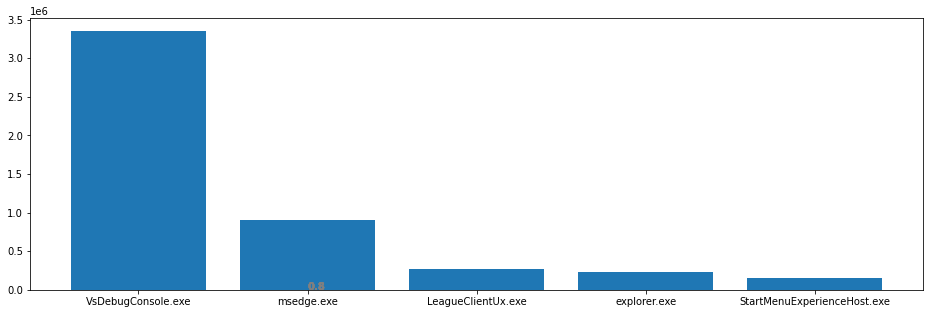

In [40]:
temp = app_duration[:5]
name = list(temp.index)
duration_time = list(temp['DURATION'])
fig, ax = plt.subplots(figsize =(16, 5))
ax.bar(name, duration_time)
#ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

<BarContainer object of 5 artists>

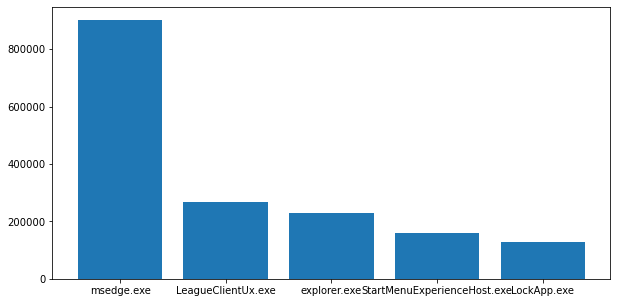

In [41]:
temp = app_duration[1:6]
name = list(temp.index)
duration_time = list(temp['DURATION'])
plt.figure(figsize=(10,5))
plt.bar(name, duration_time)

---

LSTM Time Series Forecasting

In [42]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [44]:
apps['MEASUREMENT_TIME'] = time

In [45]:
apps

,MEASUREMENT_TIME,VALUE,NEXT,DURATION
1,2022-12-08 06:23:06.681,VsDebugConsole.exe,LeagueClientUx.exe,6.016
5,2022-12-08 06:23:12.697,LeagueClientUx.exe,msedge.exe,9.033
9,2022-12-08 06:23:21.730,msedge.exe,LeagueClientUx.exe,6.002
13,2022-12-08 06:23:27.732,LeagueClientUx.exe,SearchHost.exe,18.058
17,2022-12-08 06:23:45.790,SearchHost.exe,Spotify.exe,3.003
...,...,...,...,...
12802,2023-02-10 10:53:31.624,Goose Goose Duck.exe,msedge.exe,12.043
12806,2023-02-10 10:53:43.667,msedge.exe,explorer.exe,3.003
12810,2023-02-10 10:53:46.670,explorer.exe,SearchHost.exe,3.002
12814,2023-02-10 10:53:49.672,SearchHost.exe,msedge.exe,3.009


In [46]:
apps['MEASUREMENT_TIME'][1].hour

6

In [47]:
# ohe = OneHotEncoder()
# transformed = ohe.fit_transform(np.array(apps['VALUE']).reshape(-1, 1))
# transformed = transformed.toarray()
# transformed


In [48]:
most_common(app_encode)

0

In [49]:
feature = pd.DataFrame()
feature['time_diff_seconds'] = apps['DURATION']
feature['ts_hour'] = [i.hour for i in apps['MEASUREMENT_TIME']]
feature['ts_minutes'] = [i.minute for i in apps['MEASUREMENT_TIME']]
feature['day'] = [i.day for i in apps['MEASUREMENT_TIME']]
feature['month'] = [i.month for i in apps['MEASUREMENT_TIME']]
feature['app_encoded'] = app_encode[:-1]
feature


,time_diff_seconds,ts_hour,ts_minutes,day,month,app_encoded
1,6.016,6,23,8,12,8
5,9.033,6,23,8,12,4
9,6.002,6,23,8,12,0
13,18.058,6,23,8,12,4
17,3.003,6,23,8,12,10
...,...,...,...,...,...,...
12802,12.043,10,53,10,2,7
12806,3.003,10,53,10,2,0
12810,3.002,10,53,10,2,1
12814,3.009,10,53,10,2,10


focus on the most common application

In [50]:
feature = feature[feature["app_encoded"] == 0]

In [51]:
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(feature[['ts_hour', 'ts_minutes','day','month']])

OneHotEncoder(handle_unknown='ignore')

In [52]:
encoded_cols = enc.transform(feature[['ts_hour', 'ts_minutes','day','month']]).toarray()
encoded_cols

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [53]:
encoded_df = pd.DataFrame(encoded_cols)

In [54]:
#scaler = MinMaxScaler()
diffs = np.array(feature['time_diff_seconds'])
X_std = (diffs - diffs.min(axis=0)) / (diffs.max(axis=0) - diffs.min(axis=0))
X_scaled = X_std * (X_std.max() - X_std.min()) + X_std.min()
#scaler.fit(diffs)
#scaled_diffs = scaler.transform(diffs)

In [55]:
X_scaled

array([1.24525257e-05, 1.24649700e-05, 2.48884592e-08, 2.48884592e-08,
       1.65923061e-08, 2.86864380e-04, 9.60507860e-04, 6.23746267e-05,
       1.62214681e-04, 1.74692095e-04, 4.99511375e-05, 4.61502550e-04,
       9.98354910e-04, 8.73589064e-04, 5.80730714e-08, 4.97769183e-08,
       1.74592541e-04, 6.58814936e-03, 1.31014093e-03, 3.49363449e-04,
       4.99096568e-04, 5.39249948e-08, 1.45978694e-03, 9.48275182e-04,
       4.97955432e-03, 5.62696121e-03, 5.11669388e-04, 9.98151654e-05,
       4.74124732e-03, 3.19382397e-03, 5.11374874e-04, 2.45829533e-03,
       6.22211479e-08, 2.48884592e-08, 5.86438467e-04, 8.48771123e-04,
       3.61035722e-02, 1.36010037e-03, 2.37157979e-04, 4.14807653e-09,
       2.22085528e-03, 2.50087534e-05, 1.49720674e-04, 1.46468582e-05,
       2.49672726e-05, 1.25064507e-05, 2.12199003e-04, 4.35498258e-03,
       1.55969751e-03, 1.44746301e-03, 6.36252718e-04, 2.74590222e-04,
       2.57014407e-03, 1.62179422e-03, 1.61009250e-03, 4.50402380e-02,
      

In [56]:
encoded_df['time_diff_seconds'] = X_scaled

In [57]:
encoded_df

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,time_diff_seconds
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.245253e-05
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.246497e-05
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.488846e-08
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.488846e-08
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.659231e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.000091e-05
794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.539867e-05
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.074038e-08
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.244423e-08


drop app, use 1 application, try to run without reshape. check the dimensions,

In [58]:
dataset_lstm_scaled = encoded_df.to_numpy()

In [59]:
dataset_lstm_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.24525257e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.24649700e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.48884592e-08],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 2.07403826e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.24442296e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 4.97769183e-08]])

In [60]:
def create_dataset(dataset, look_back):
    X,Y = [], []
    for i in range(len(dataset) - look_back -1):
        a = dataset[i:(i+look_back),0]
        X.append(a)
        Y.append(dataset[i + look_back,0])
    return np.array(X), np.array(Y)


In [61]:
train_size = int(len(dataset_lstm_scaled)* 0.8)
test_size = len(dataset_lstm_scaled) - train_size
train, test = dataset_lstm_scaled[:train_size,:], dataset_lstm_scaled[train_size:len(dataset_lstm_scaled),:]

look_back = 5
X_train_lstm, Y_train_lstm = create_dataset(train, look_back)
X_test_lstm, Y_test_lstm = create_dataset(test, look_back)

X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], 1, X_test_lstm.shape[1]))

In [62]:
# def df_to_X_y(df, window_size = 10):
#     df_as_np = df.to_numpy()
#     X=[]
#     y=[]
#     for i in range(len(df_as_np) - window_size):
#         row = [[a] for a in df_as_np[i:i+window_size]]
#         X.append(row)
#         label = df_as_np[i+window_size]
#         y.append(label)
#     return np.array(X), np.array(y)

In [63]:
# X, y = df_to_X_y(feature['duration'])
# train_size = int(len(feature)* 0.8)
# test_size = len(feature) - train_size
# X_train, y_train = X[:train_size], y[:train_size]
# X_test, y_test = X[train_size:len(feature)], y[train_size:len(feature)]


Build a model

In [141]:
model = Sequential()


model.add(LSTM(units = 10, return_sequences=True,input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
#model.add(Dropout(0.2))

model.add(LSTM(units = 20, return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(units = 8, return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(units = 10))
#model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 1, 10)             640       
_________________________________________________________________
lstm_13 (LSTM)               (None, 1, 20)             2480      
_________________________________________________________________
lstm_14 (LSTM)               (None, 1, 8)              928       
_________________________________________________________________
lstm_15 (LSTM)               (None, 10)                760       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 4,819
Trainable params: 4,819
Non-trainable params: 0
_________________________________________________________________


In [142]:
history = model.fit(X_train_lstm, Y_train_lstm, epochs=30, batch_size=10, validation_data=(X_test_lstm, Y_test_lstm), callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose = 1, shuffle = False)

Epoch 1/30
64/64 [==============================] - 9s 28ms/step - loss: 0.0971 - val_loss: 0.0781
Epoch 2/30
64/64 [==============================] - 1s 9ms/step - loss: 0.0923 - val_loss: 0.0757
Epoch 3/30
64/64 [==============================] - 1s 11ms/step - loss: 0.0885 - val_loss: 0.0715
Epoch 4/30
64/64 [==============================] - 1s 8ms/step - loss: 0.0788 - val_loss: 0.0591
Epoch 5/30
64/64 [==============================] - 0s 6ms/step - loss: 0.0571 - val_loss: 0.0436
Epoch 6/30
64/64 [==============================] - 0s 6ms/step - loss: 0.0409 - val_loss: 0.0373
Epoch 7/30
64/64 [==============================] - 0s 7ms/step - loss: 0.0359 - val_loss: 0.0339
Epoch 8/30
64/64 [==============================] - 0s 6ms/step - loss: 0.0332 - val_loss: 0.0311
Epoch 9/30
64/64 [==============================] - 0s 6ms/step - loss: 0.0313 - val_loss: 0.0290
Epoch 10/30
64/64 [==============================] - 0s 6ms/step - loss: 0.0299 - val_loss: 0.0275
Epoch 11/30
64/64

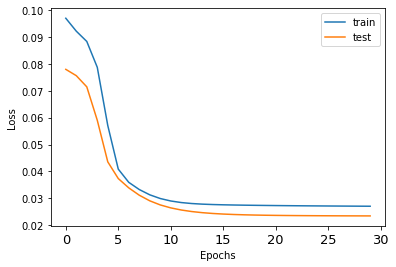

In [143]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
#plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [67]:
# plt.plot(history.history['val_loss'], label = 'test')
# plt.legend()
# plt.show

In [85]:
trainPredict = model.predict(X_train_lstm)
testPredict = model.predict(X_test_lstm)

In [86]:
apps

,MEASUREMENT_TIME,VALUE,NEXT,DURATION,Time
1,2022-12-08 06:23:06.681,VsDebugConsole.exe,LeagueClientUx.exe,6.016,2022-12-08
5,2022-12-08 06:23:12.697,LeagueClientUx.exe,msedge.exe,9.033,2022-12-08
9,2022-12-08 06:23:21.730,msedge.exe,LeagueClientUx.exe,6.002,2022-12-08
13,2022-12-08 06:23:27.732,LeagueClientUx.exe,SearchHost.exe,18.058,2022-12-08
17,2022-12-08 06:23:45.790,SearchHost.exe,Spotify.exe,3.003,2022-12-08
...,...,...,...,...,...
12802,2023-02-10 10:53:31.624,Goose Goose Duck.exe,msedge.exe,12.043,2023-02-10
12806,2023-02-10 10:53:43.667,msedge.exe,explorer.exe,3.003,2023-02-10
12810,2023-02-10 10:53:46.670,explorer.exe,SearchHost.exe,3.002,2023-02-10
12814,2023-02-10 10:53:49.672,SearchHost.exe,msedge.exe,3.009,2023-02-10


Text(0, 0.5, 'Scaled Usage Time')

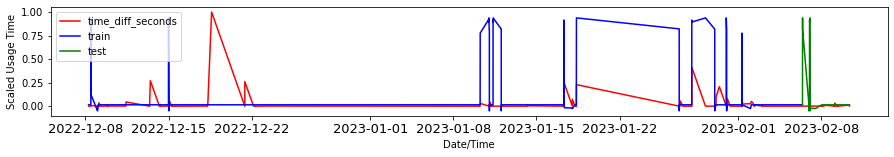

In [144]:
plt.figure(figsize=(15,2))
edgedf = apps[apps["VALUE"] == "msedge.exe"].iloc[:len(trainPredict) + len(testPredict)]
times = list(edgedf["MEASUREMENT_TIME"])
traintime = times[:len(trainPredict)]
testtime = times[len(trainPredict): ]
plt.plot(times, X_scaled[:len(trainPredict) + len(testPredict)], label = 'time_diff_seconds', color ='r')
plt.plot(traintime, trainPredict, color = "blue", label = 'train')
plt.plot(testtime, testPredict, color = "green", label = 'test')
plt.legend(loc = 'upper left')
plt.xlabel('Date/Time')
plt.ylabel('Scaled Usage Time')

In [71]:
trainPredict[0]

array([0.10683955], dtype=float32)

In [89]:
difference = 0
for i in range(len(trainPredict)):
    #print(trainPredict[i][0])
    #print(X_scaled[i])
    if (np.absolute(trainPredict[i][0] - X_scaled[i]) > 0.02):
        difference += 1
    
#print(i)
for j in range(len(testPredict)):
    if (np.absolute(testPredict[j][0] - X_scaled[len(trainPredict)+j+1]) > 0.02):
        difference += 1

accuracy

In [90]:
1 - difference/(len(trainPredict)+len(testPredict))

0.8435114503816794

Visualization

<ipython-input-74-a6ec02ea38eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fgnd_df_app['mov_avg'] =  fgnd_df_app['DURATION'].rolling(3).mean()
<ipython-input-74-a6ec02ea38eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fgnd_df_app['exp_mov_avg'] = fgnd_df_app['DURATION'].ewm(alpha=0.001).mean()


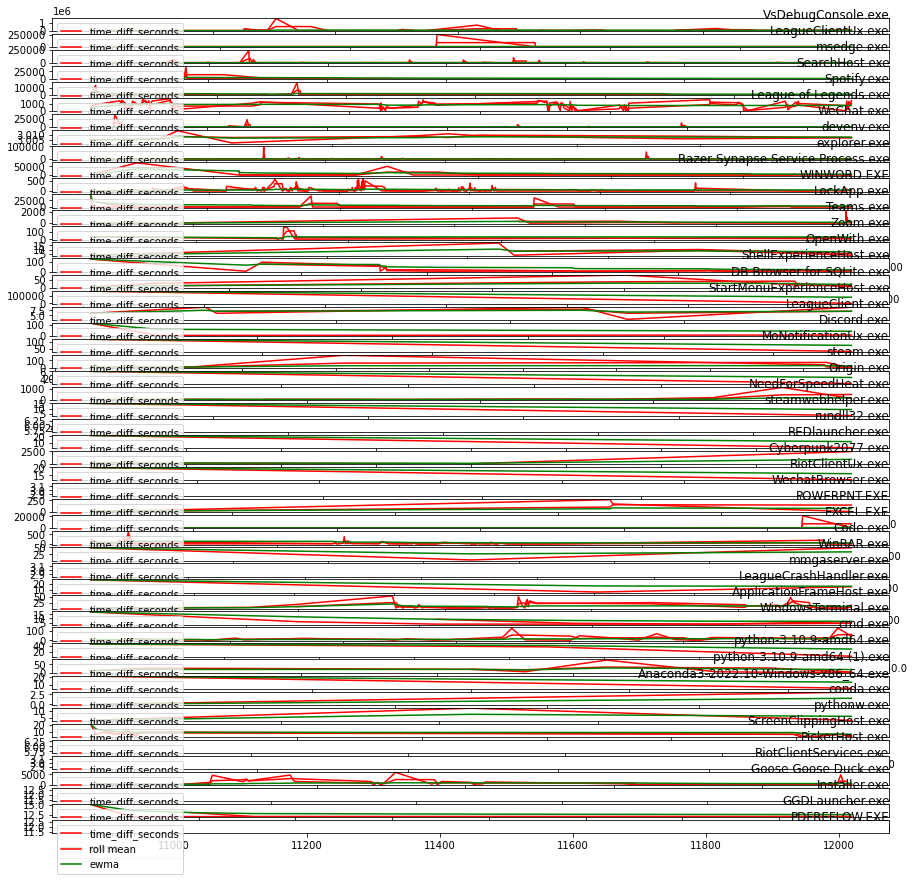

In [74]:
#The Daily foreground duration per app with moving avg& exp moving avg
i = 1
plt.figure(figsize=(15,15))
for j in apps['VALUE'].unique():
    plt.subplot(len(apps['VALUE'].unique()),1,i)
    fgnd_df_app = apps.loc[apps['VALUE'] == j]
    fgnd_df_app['mov_avg'] =  fgnd_df_app['DURATION'].rolling(3).mean()
    fgnd_df_app['exp_mov_avg'] = fgnd_df_app['DURATION'].ewm(alpha=0.001).mean()
    
    plt.plot(fgnd_df_app['DURATION'], label = 'time_diff_seconds', color ='r')
    plt.plot(fgnd_df_app['mov_avg'], label='roll mean', color='r')
    plt.plot(fgnd_df_app['exp_mov_avg'], label = 'ewma', color = 'g')
    plt.legend(loc=2)
    plt.title(j,y=0.5,loc='right')
    i +=1
plt.show()

In [75]:
date1 = [str(i)[:10] for i in apps['MEASUREMENT_TIME']]
x_axis = []
for i in date1:
    if i not in x_axis:
        x_axis.append(i)
x_axis

['2022-12-08',
 '2022-12-09',
 '2022-12-10',
 '2022-12-11',
 '2022-12-13',
 '2022-12-14',
 '2022-12-15',
 '2022-12-18',
 '2022-12-21',
 '2022-12-22',
 '2022-12-23',
 '2023-01-10',
 '2023-01-11',
 '2023-01-12',
 '2023-01-14',
 '2023-01-17',
 '2023-01-18',
 '2023-01-19',
 '2023-01-27',
 '2023-01-28',
 '2023-01-29',
 '2023-01-30',
 '2023-01-31',
 '2023-02-01',
 '2023-02-02',
 '2023-02-03',
 '2023-02-06',
 '2023-02-07',
 '2023-02-08',
 '2023-02-09',
 '2023-02-10']

In [76]:
apps['Time'] = date1

In [77]:
duration_sum = apps.groupby(['Time','VALUE'])['DURATION'].sum().reset_index()
all_app = list(set(duration_sum['VALUE']))

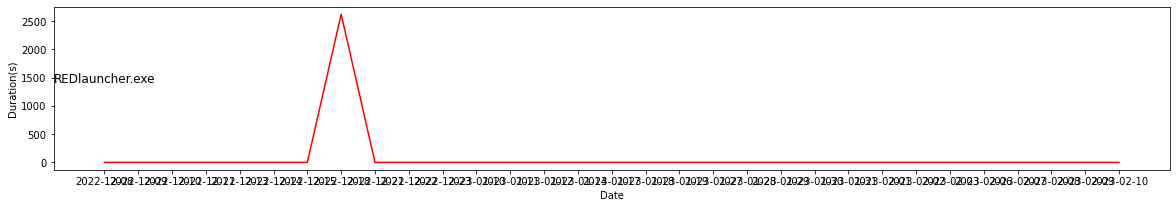

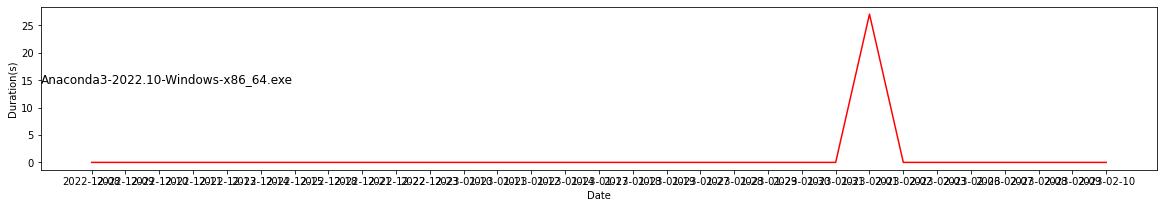

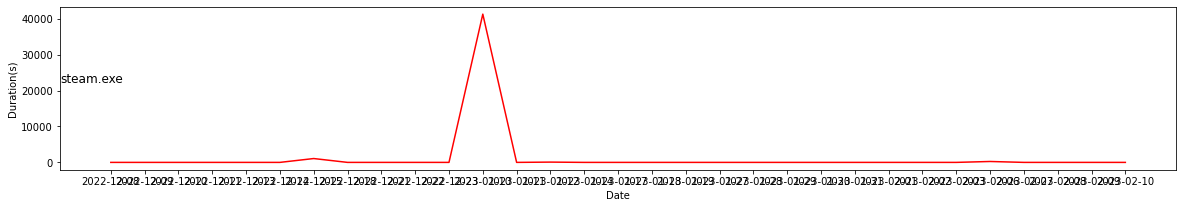

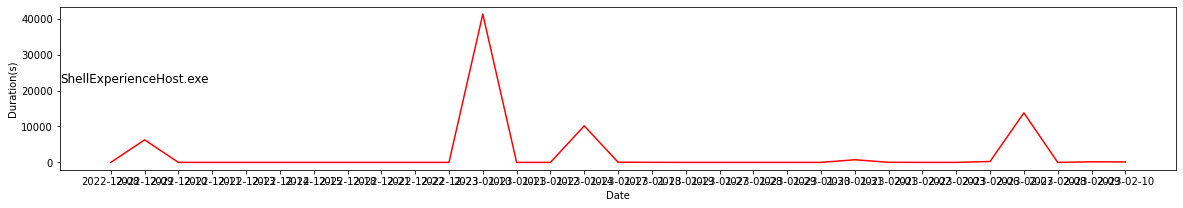

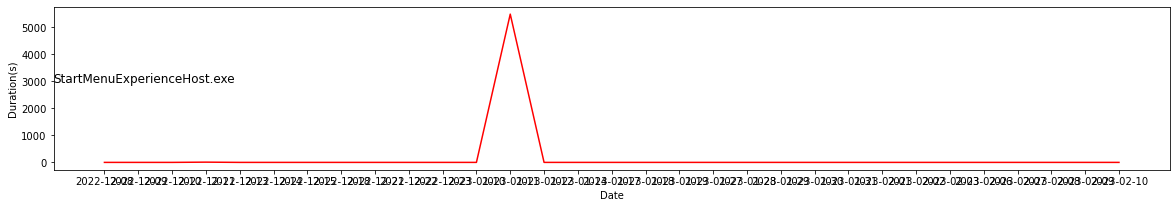

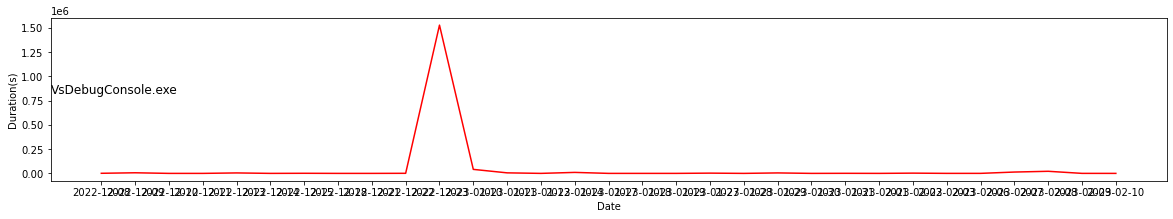

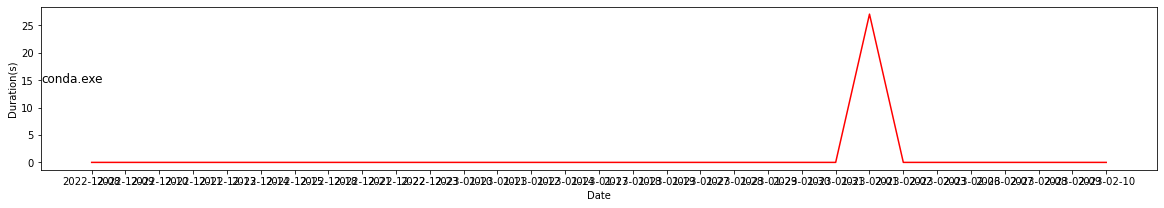

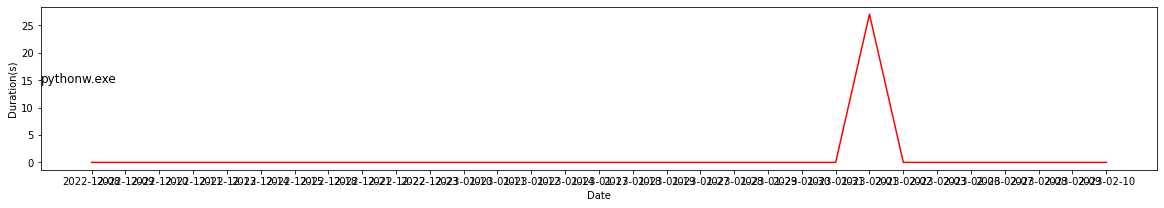

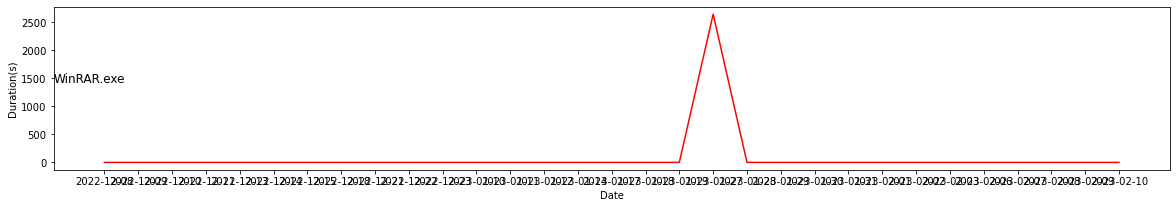

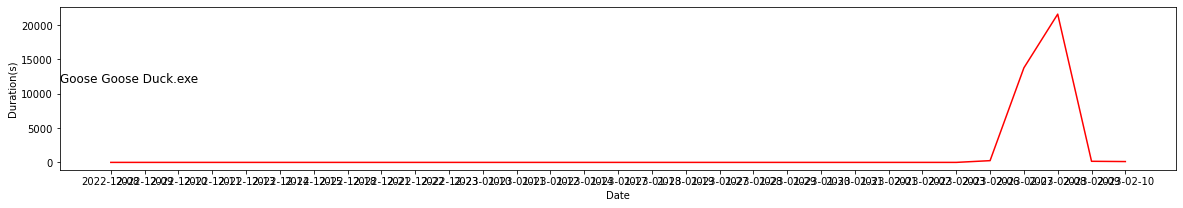

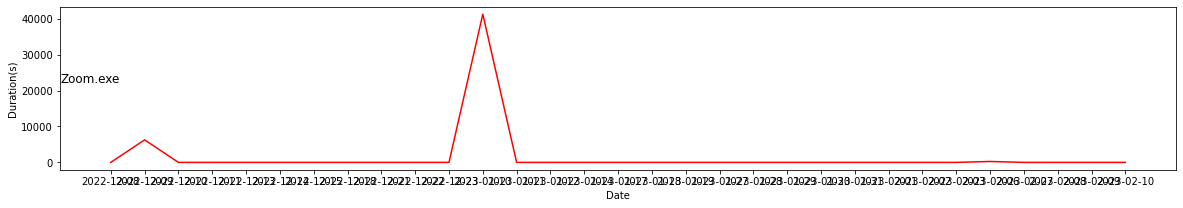

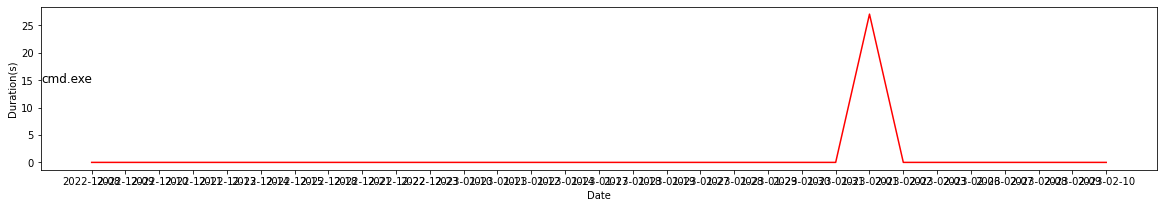

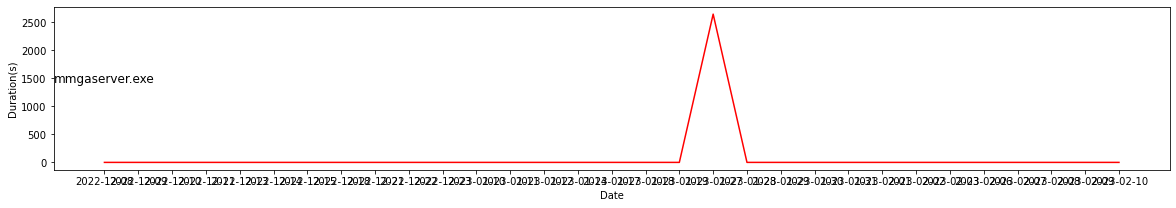

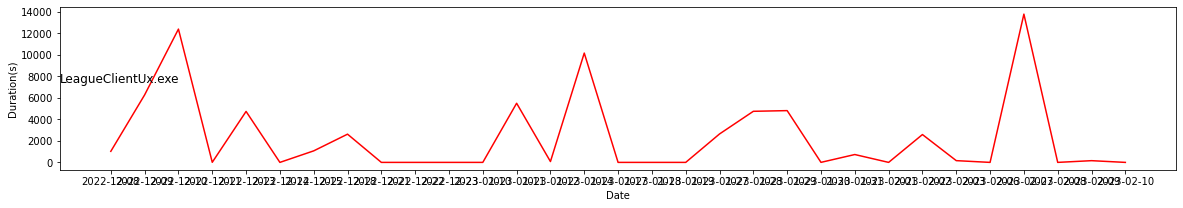

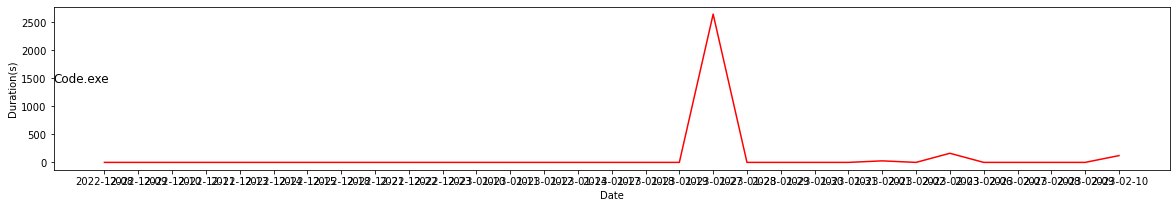

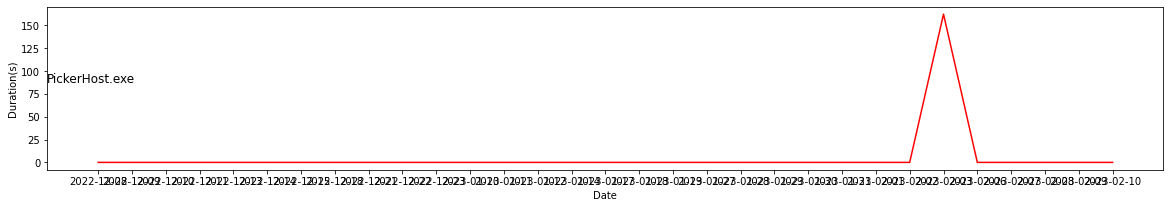

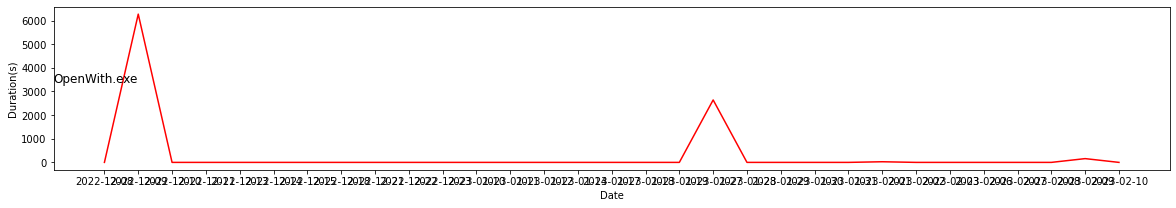

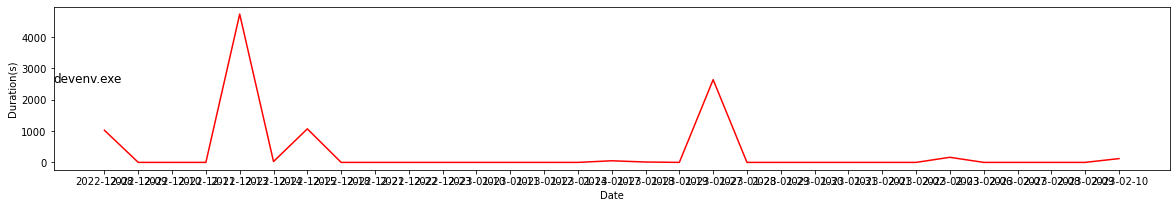

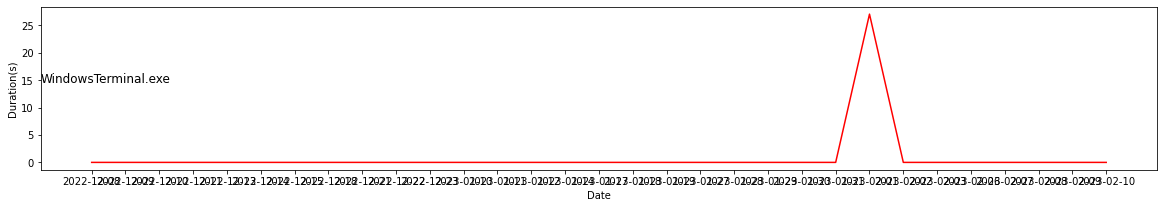

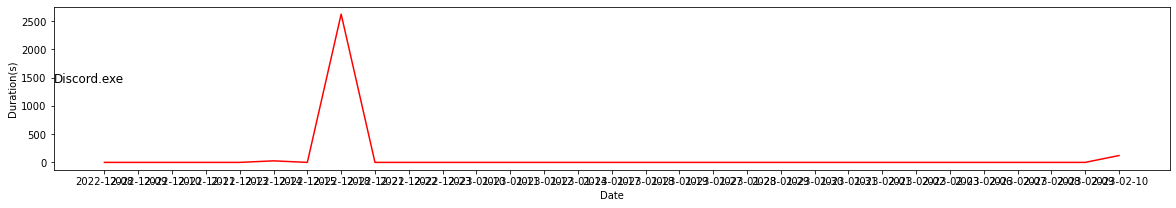

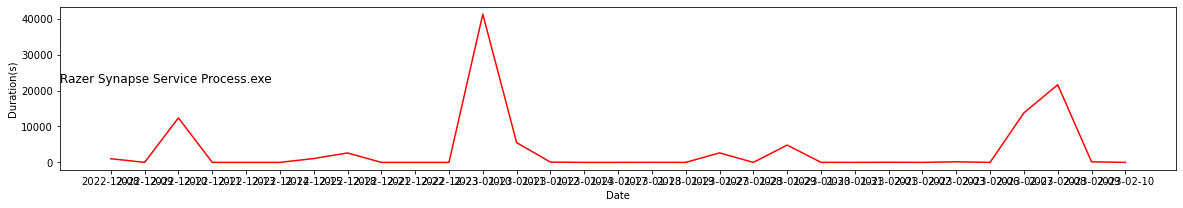

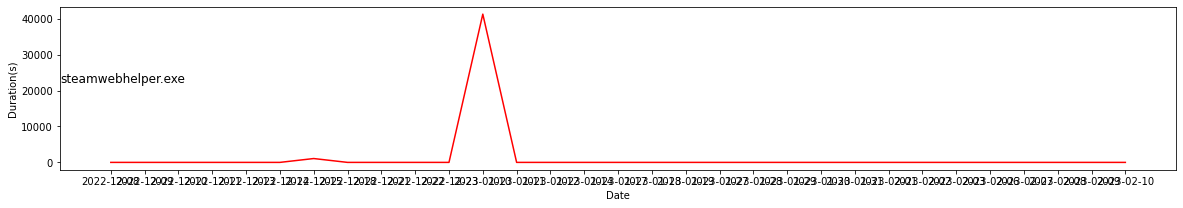

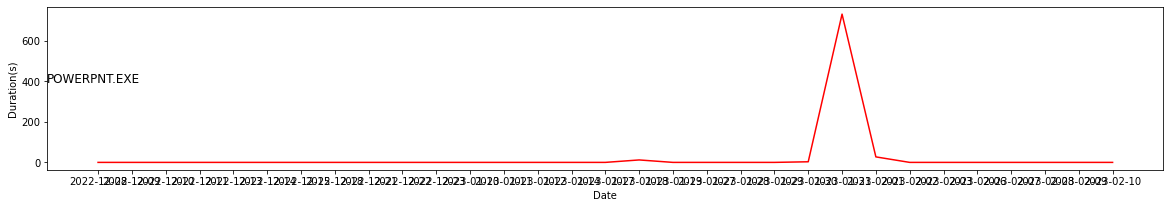

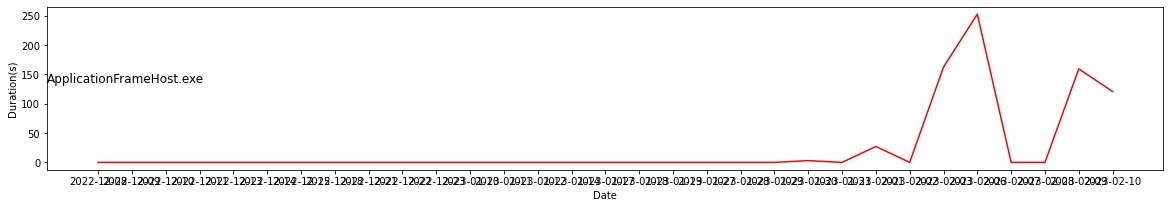

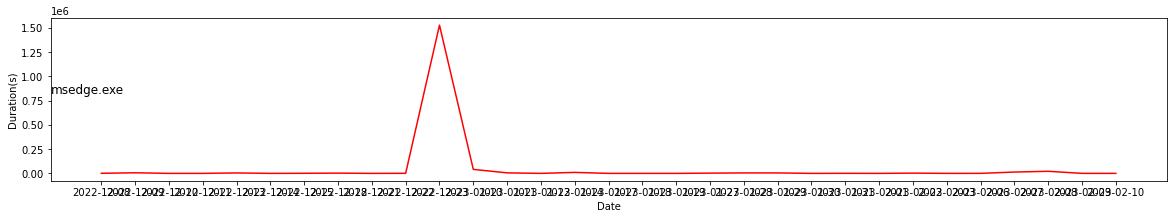

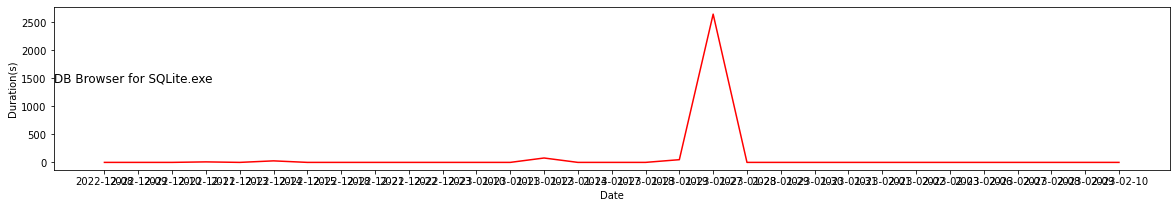

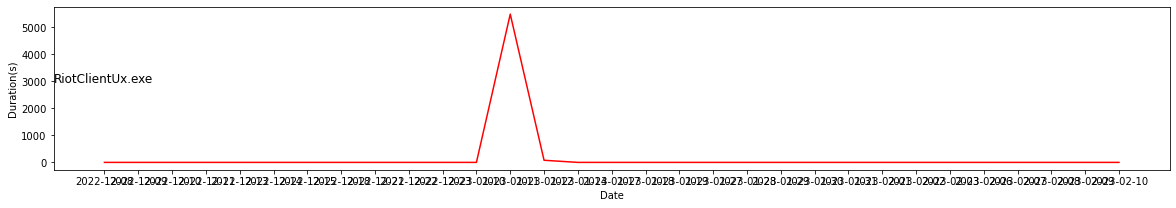

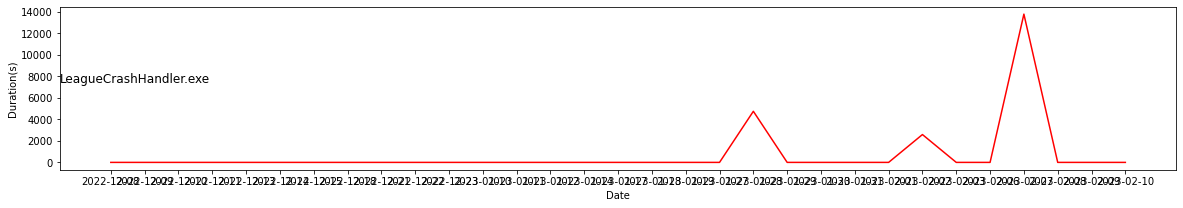

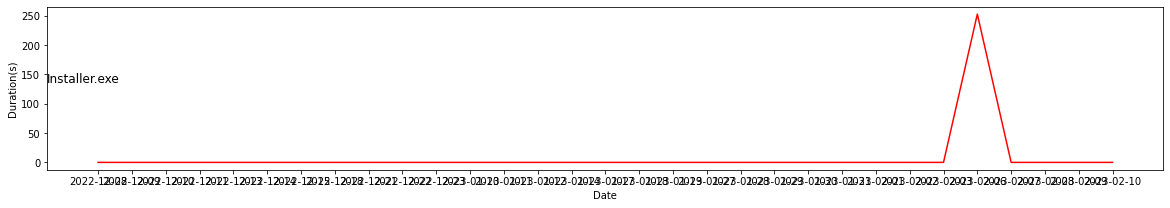

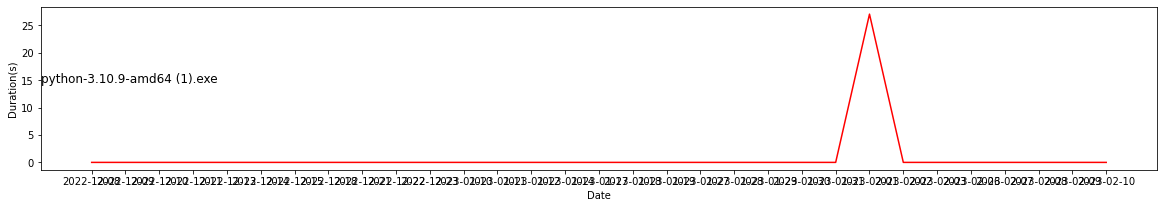

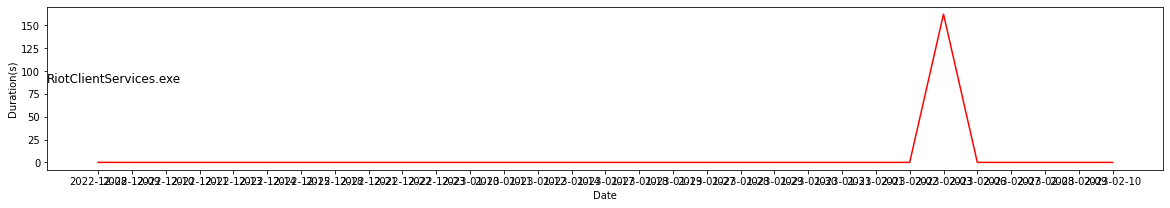

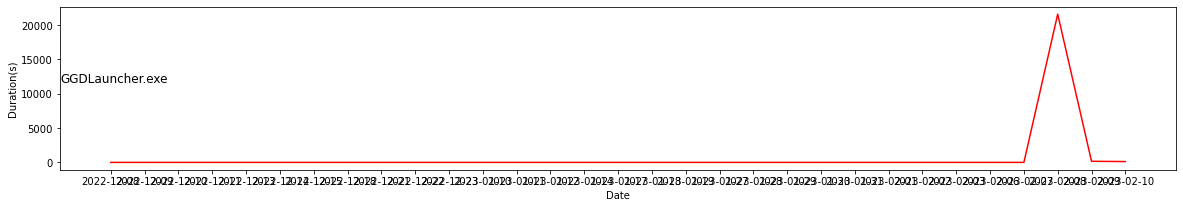

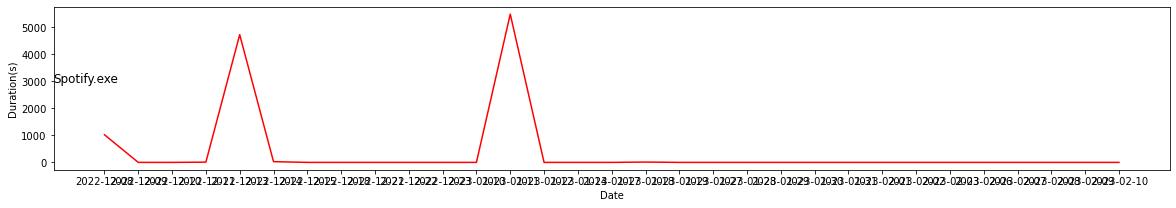

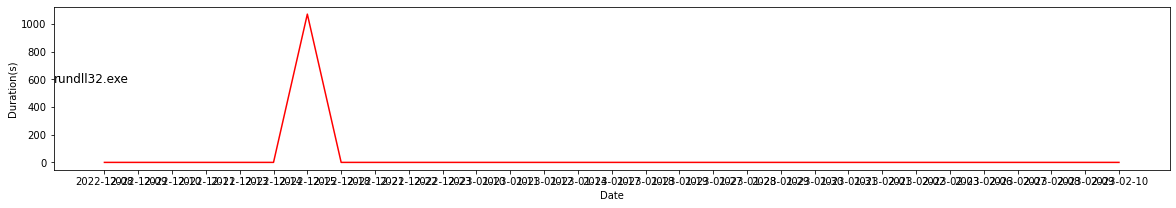

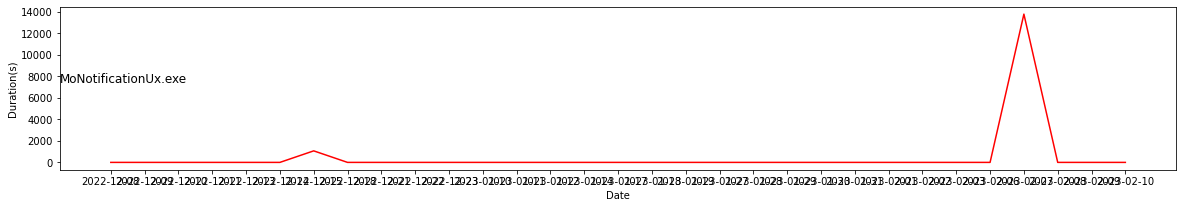

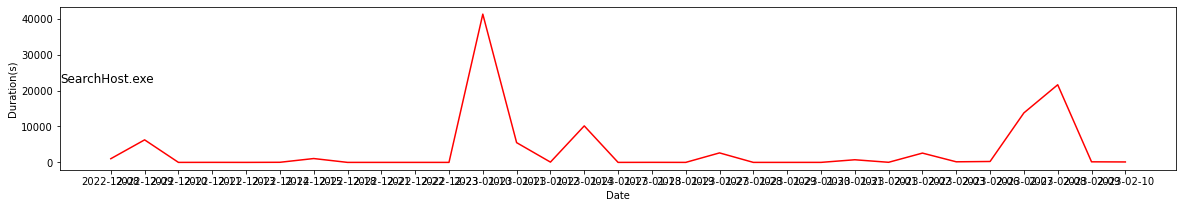

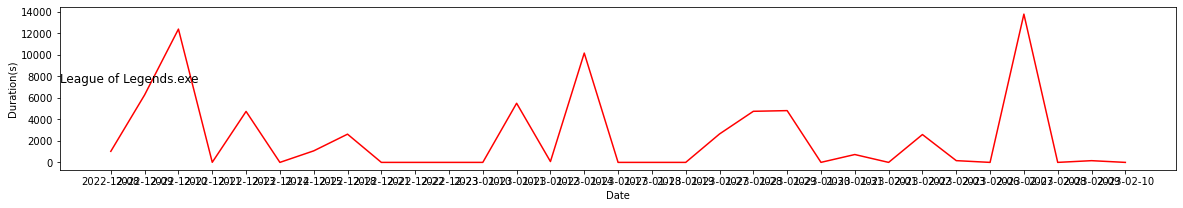

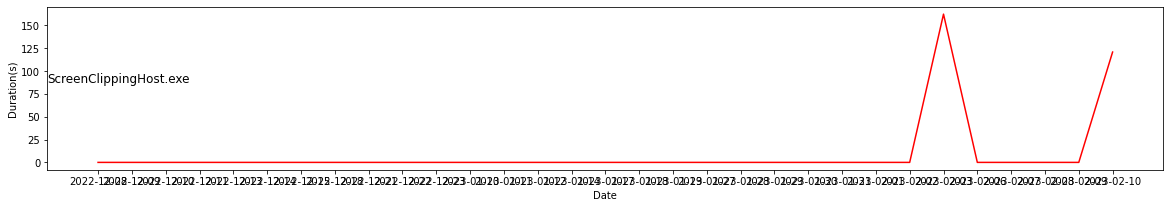

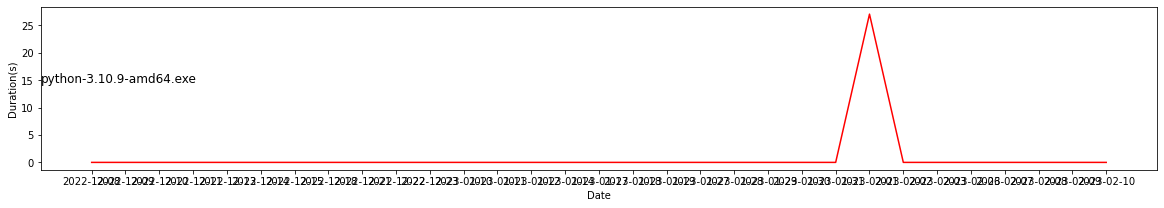

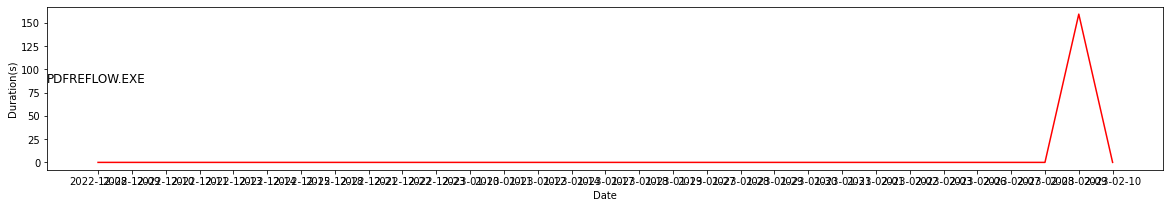

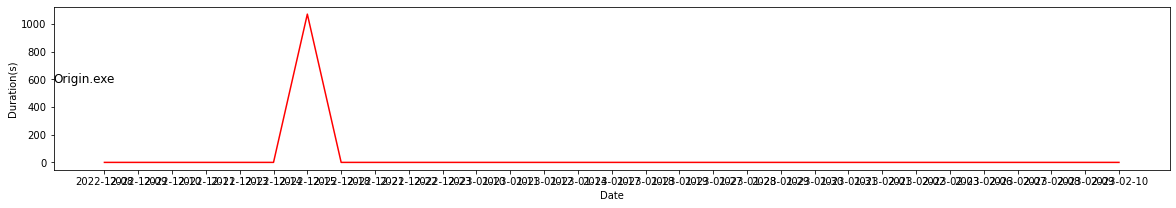

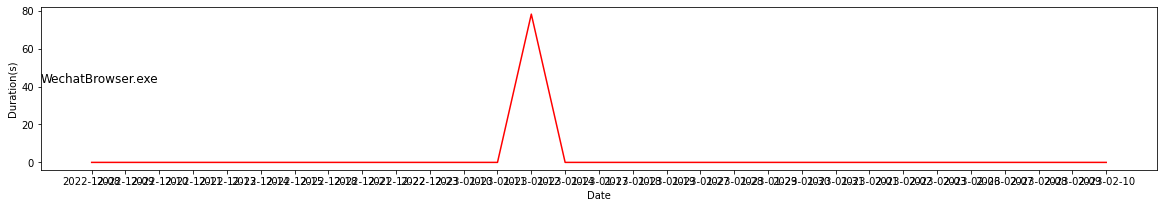

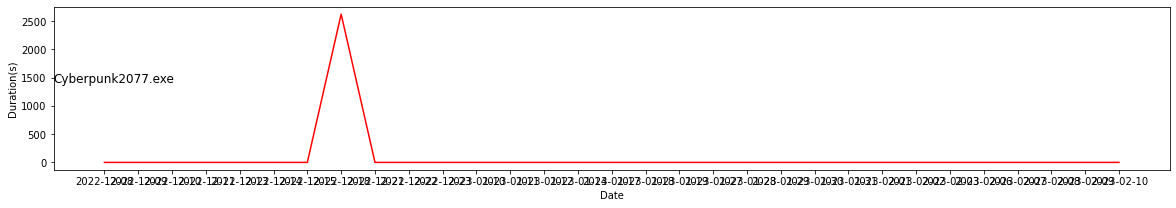

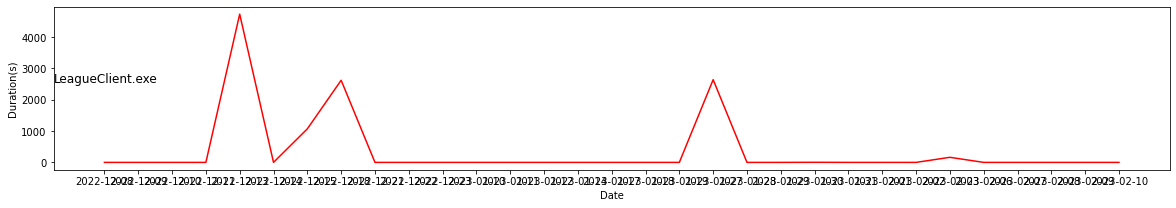

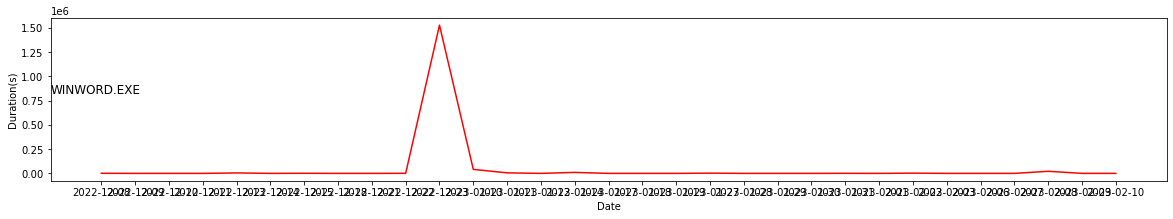

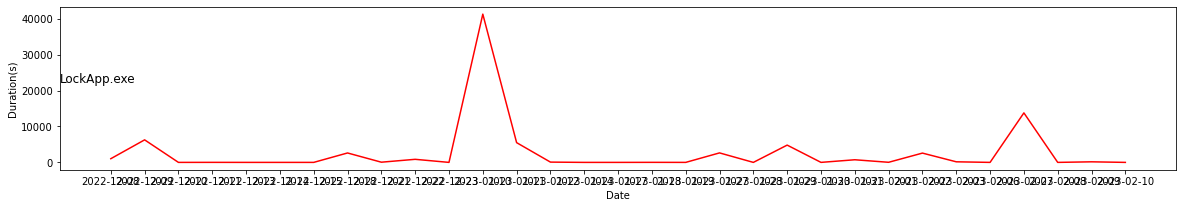

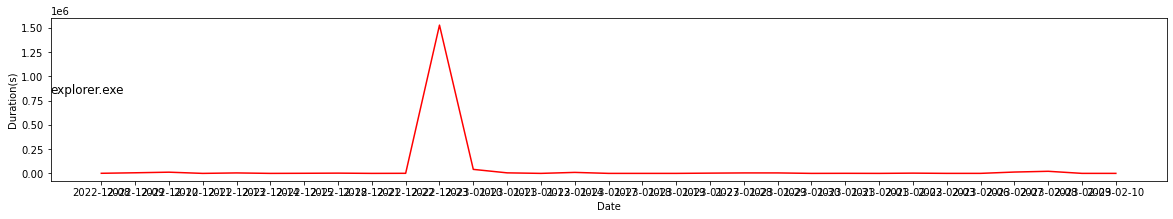

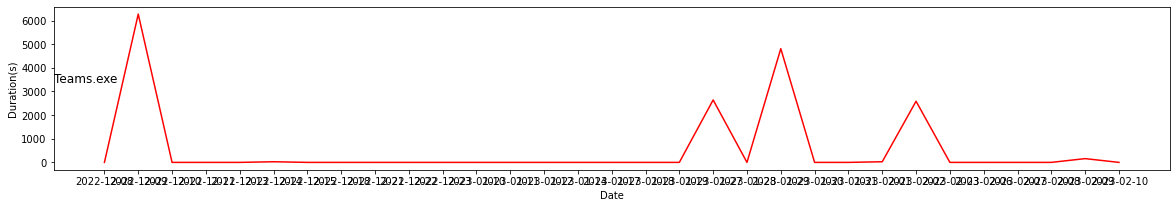

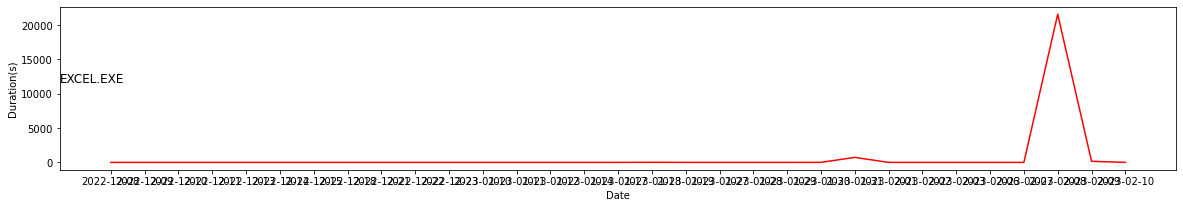

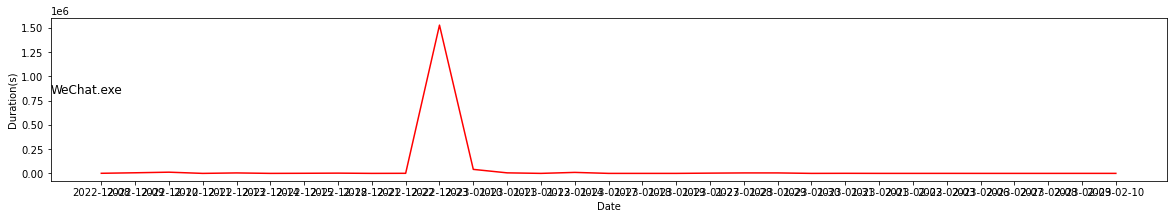

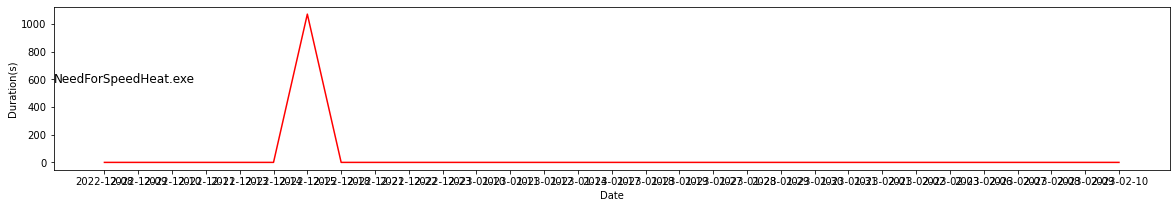

In [78]:
for j in all_app:
    plt.figure(figsize=(20,3))
    check = list(duration_sum[duration_sum['VALUE'] == j]['Time'])
    time_everyday = []
    for i in x_axis:
        if i in check:
            dura = list(duration_sum[duration_sum['Time'] == i]['DURATION'])[0]
            time_everyday.append(dura)
        else:
            time_everyday.append(0)
    
    plt.xlabel("Date")
    plt.ylabel("Duration(s)")
    plt.plot(x_axis, time_everyday, color = 'r')
    plt.title(j,y=0.5,loc='left')
    plt.show()